In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("2019_METEO.csv")
df2 = pd.read_csv("2020_METEO.csv")
df3 = pd.read_csv("2021_METEO.csv")
df4 = pd.read_csv("2022_METEO.csv")
df5 = pd.read_csv("2023_METEO.csv")

In [3]:
resultado = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [4]:
resultado

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,year,month,day,valor,Datetime,validacion,id
0,28,79,102,VV,28079102_81_98,2019,1,1,0.66,2019-01-01,V,2019-01-01-102
1,28,79,102,VV,28079102_81_98,2019,2,1,4.32,2019-02-01,V,2019-02-01-102
2,28,79,102,VV,28079102_81_98,2019,3,1,1.57,2019-03-01,V,2019-03-01-102
3,28,79,102,VV,28079102_81_98,2019,4,1,1.32,2019-04-01,V,2019-04-01-102
4,28,79,102,VV,28079102_81_98,2019,5,1,2.06,2019-05-01,V,2019-05-01-102
...,...,...,...,...,...,...,...,...,...,...,...,...
141243,28,79,59,RS,28079059_88_98,2023,7,31,330.00,2023-07-31,V,2023-07-31-59
141244,28,79,59,P,28079059_89_98,2023,1,31,0.00,2023-01-31,V,2023-01-31-59
141245,28,79,59,P,28079059_89_98,2023,3,31,0.00,2023-03-31,V,2023-03-31-59
141246,28,79,59,P,28079059_89_98,2023,5,31,0.00,2023-05-31,V,2023-05-31-59


In [5]:
resultado['MAGNITUD'].unique()

array(['VV', 'DV', 'TEMP', 'HR', 'PB', 'RS', 'P', 'RU'], dtype=object)

In [6]:
resultado['year'].unique()

array([2019, 2020, 2021, 2022, 2023])

In [7]:
resultado.duplicated().sum()

0

In [8]:
resultado.isnull().sum().sum()

0

In [9]:
resultado.isnull().values.any()

False

In [10]:
resultado_pivot = resultado.pivot_table('valor', ['ESTACION','month', 'year'], 'MAGNITUD')

In [11]:
resultado_pivot

MAGNITUD             DV         HR   P  PB  RS  RU       TEMP  VV
ESTACION month year                                              
4        1     2019 NaN        NaN NaN NaN NaN NaN   5.587097 NaN
               2020 NaN        NaN NaN NaN NaN NaN   5.770000 NaN
               2021 NaN        NaN NaN NaN NaN NaN   0.487500 NaN
               2023 NaN        NaN NaN NaN NaN NaN   6.532258 NaN
         2     2019 NaN        NaN NaN NaN NaN NaN   8.464286 NaN
...                  ..        ...  ..  ..  ..  ..        ...  ..
115      11    2020 NaN  79.133333 NaN NaN NaN NaN  11.753333 NaN
               2021 NaN  63.730769 NaN NaN NaN NaN   9.380769 NaN
         12    2019 NaN  76.774194 NaN NaN NaN NaN   9.290323 NaN
               2020 NaN  74.161290 NaN NaN NaN NaN   8.193548 NaN
               2021 NaN  74.193548 NaN NaN NaN NaN   9.312903 NaN

[1346 rows x 8 columns]

In [20]:
resultado_pivot.describe()

MAGNITUD,DV,HR,P,PB,RS,RU,TEMP,VV
count,522.000000,1191.000000,529.000000,416.000000,419.000000,15.000000,1224.000000,522.000000
mean,101.980249,53.967450,0.899707,944.737854,203.936864,17.029968,16.002898,1.314981
std,53.001432,15.682943,0.879931,5.155698,89.417292,10.407307,7.478442,0.421830
min,1.214286,4.379310,0.000000,916.206897,54.322581,4.322581,0.487500,0.450968
25%,65.107527,41.031146,0.164516,940.483871,121.390476,8.839286,9.819355,1.028387
50%,95.110000,54.571429,0.582143,944.690562,203.516129,15.900000,14.527419,1.248065
75%,133.388710,66.360753,1.425806,948.541667,288.445699,23.276882,22.423137,1.550218
max,282.133333,90.741935,4.435484,958.689655,351.821429,40.157895,33.900000,2.683478


In [25]:
resultado_pivot.isnull().sum().sum()

5930

## PRUEBA DE DISPERSIÓN

In [21]:
columna1 = resultado_pivot['HR']
columna2 = resultado_pivot['P']

In [22]:
df_nuevo = pd.DataFrame({'HR': columna1, 'P': columna2})

In [24]:
df_nuevo.to_csv('dispersión1.csv', index=False)

In [34]:
columna1 = resultado_pivot['P']
columna2 = resultado_pivot['TEMP']

In [35]:
df_nuevo = pd.DataFrame({'P': columna1, 'TEMP': columna2})

In [36]:
df_nuevo.to_csv('dispersión2.csv', index=False)

In [37]:
columna1 = resultado_pivot['TEMP']
columna2 = resultado_pivot['RS']

In [38]:
df_nuevo = pd.DataFrame({'TEMP': columna1, 'RS': columna2})

In [39]:
df_nuevo.to_csv('dispersión3.csv', index=False)

In [40]:
columna1 = resultado_pivot['TEMP']
columna2 = resultado_pivot['HR']

In [41]:
df_nuevo = pd.DataFrame({'TEMP': columna1, 'HR': columna2})

In [43]:
df_nuevo.to_csv('dispersión4.csv', index=False)

## HISTOGRAMAS ANTES 

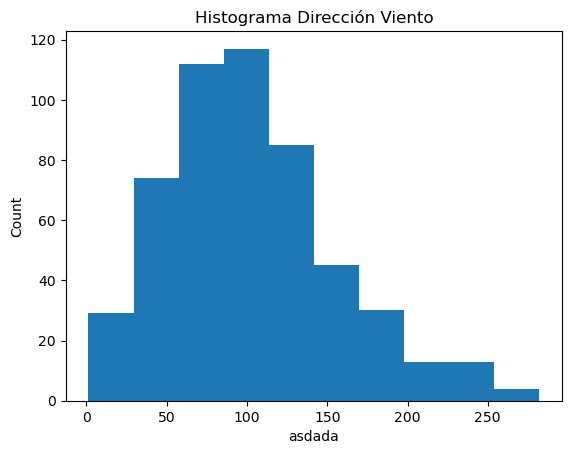

In [17]:
plt.hist(resultado_pivot.DV, bins=10)
plt.title("Histograma Dirección Viento")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

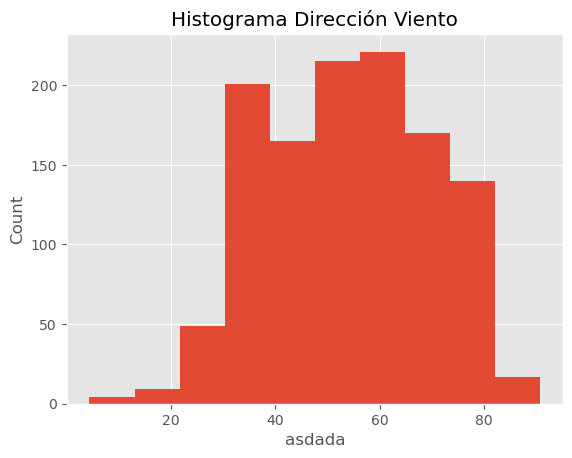

In [18]:
plt.hist(resultado_pivot.HR, bins=10)
plt.title("Histograma Humedad Relativa")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

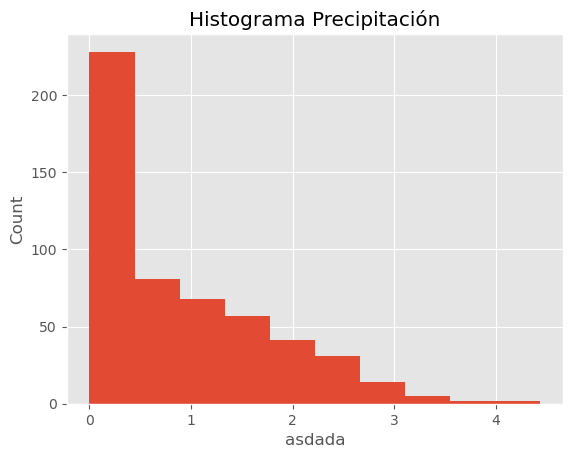

In [27]:
plt.hist(resultado_pivot.P, bins=10)
plt.title("Histograma Precipitación")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

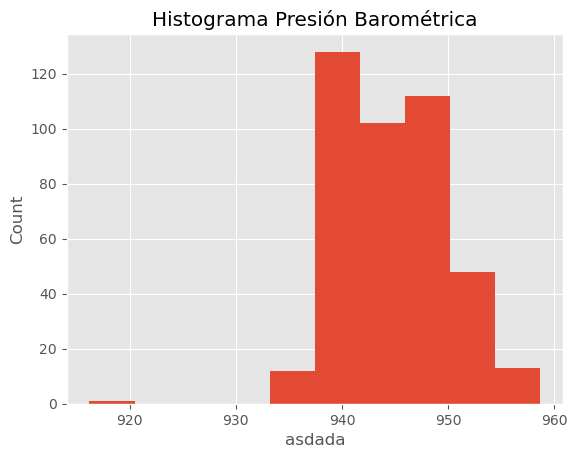

In [28]:
plt.hist(resultado_pivot.PB, bins=10)
plt.title("Histograma Presión Barométrica")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

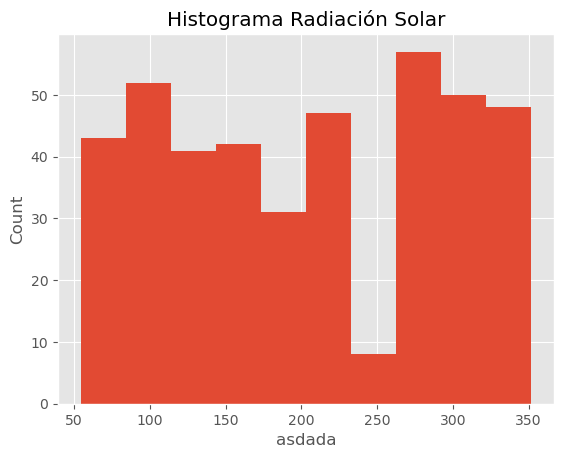

In [29]:
plt.hist(resultado_pivot.RS, bins=10)
plt.title("Histograma Radiación Solar")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

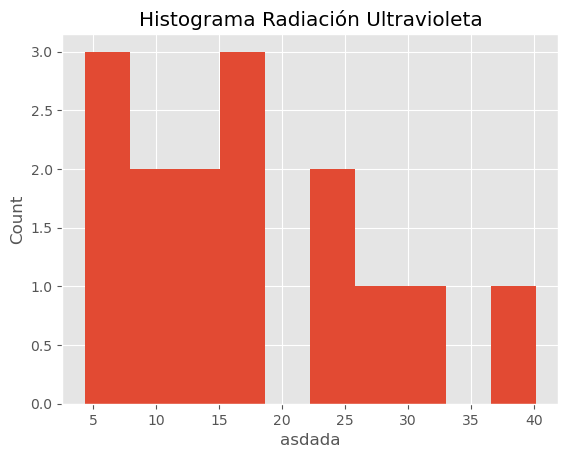

In [31]:
plt.hist(resultado_pivot.RU, bins=10)
plt.title("Histograma Radiación Ultravioleta")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

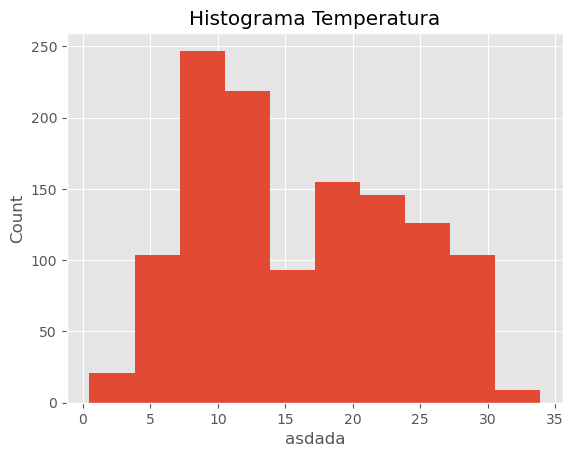

In [32]:
plt.hist(resultado_pivot.TEMP, bins=10)
plt.title("Histograma Temperatura")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

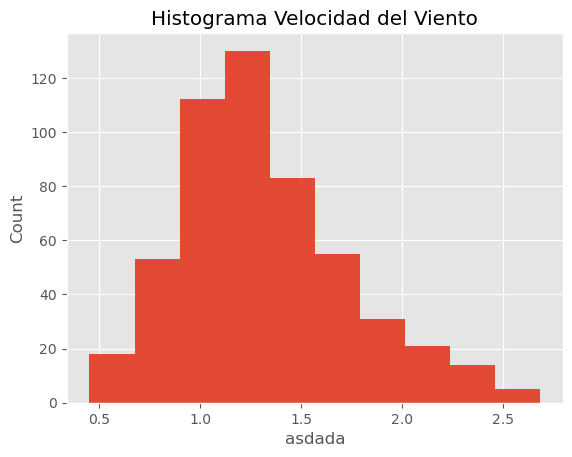

In [33]:
plt.hist(resultado_pivot.VV, bins=10)
plt.title("Histograma Velocidad del Viento")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

<AxesSubplot:xlabel='DV'>

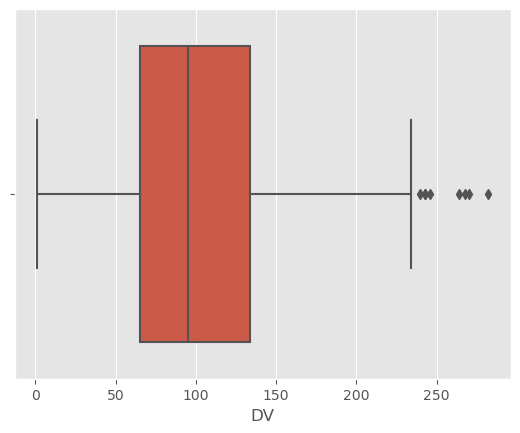

In [19]:
sns.boxplot(x=resultado_pivot.DV)

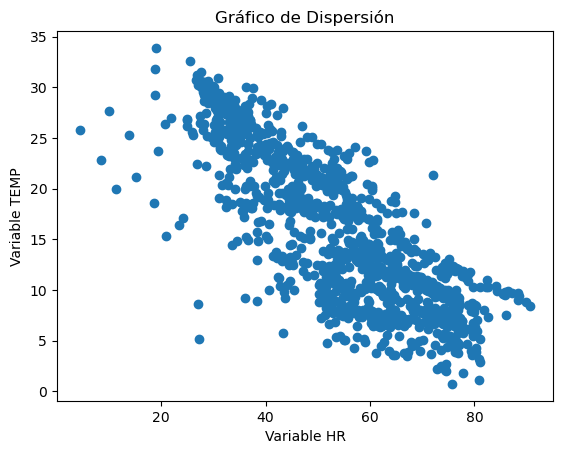

In [16]:
x = resultado_pivot.HR
y = resultado_pivot.TEMP
plt.xlabel("Variable HR")
plt.ylabel("Variable TEMP")
plt.title("Gráfico de Dispersión")
plt.scatter(x, y)

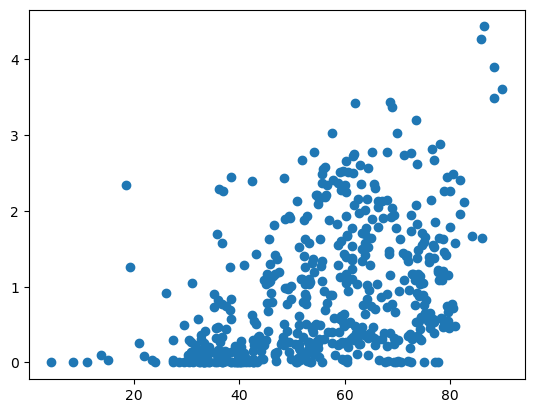

In [15]:
x = resultado_pivot.HR
y = resultado_pivot.P
plt.scatter(x, y)

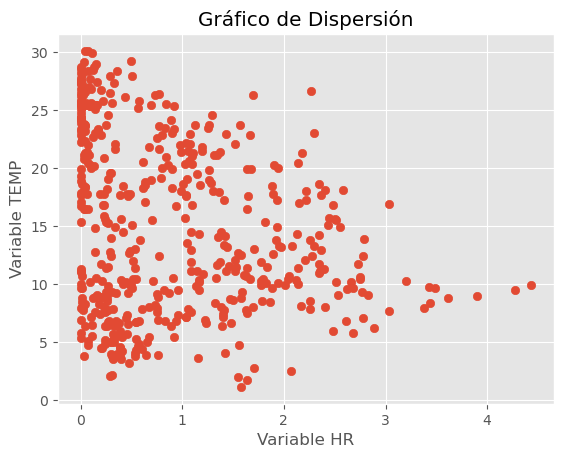

In [44]:
x = resultado_pivot.P
y = resultado_pivot.TEMP
plt.xlabel("Variable HR")
plt.ylabel("Variable TEMP")
plt.title("Gráfico de Dispersión")
plt.scatter(x, y)

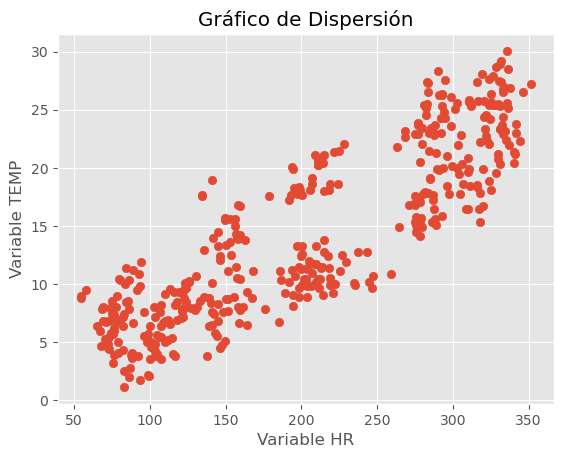

In [45]:
x = resultado_pivot.RS
y = resultado_pivot.TEMP
plt.xlabel("Variable HR")
plt.ylabel("Variable TEMP")
plt.title("Gráfico de Dispersión")
plt.scatter(x, y)

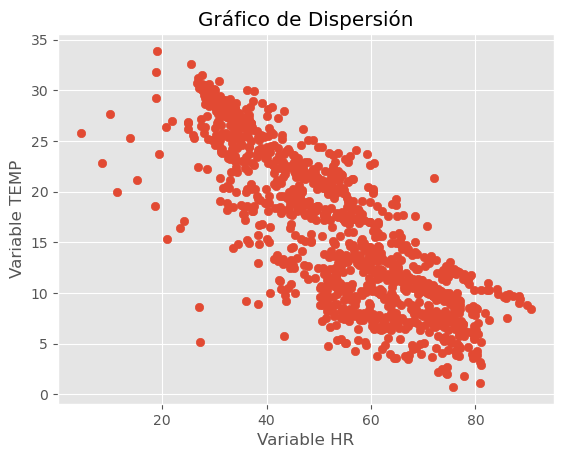

In [46]:
x = resultado_pivot.HR
y = resultado_pivot.TEMP
plt.xlabel("Variable HR")
plt.ylabel("Variable TEMP")
plt.title("Gráfico de Dispersión")
plt.scatter(x, y)

In [82]:
resultado_pivot.index

MultiIndex([(  4,  1, 2019),
            (  4,  1, 2020),
            (  4,  1, 2021),
            (  4,  1, 2023),
            (  4,  2, 2019),
            (  4,  2, 2020),
            (  4,  2, 2021),
            (  4,  2, 2023),
            (  4,  3, 2019),
            (  4,  3, 2021),
            ...
            (115,  9, 2021),
            (115,  9, 2022),
            (115, 10, 2019),
            (115, 10, 2020),
            (115, 11, 2019),
            (115, 11, 2020),
            (115, 11, 2021),
            (115, 12, 2019),
            (115, 12, 2020),
            (115, 12, 2021)],
           names=['ESTACION', 'month', 'year'], length=1346)

In [12]:
resultado_pivot.columns

Index(['DV', 'HR', 'P', 'PB', 'RS', 'RU', 'TEMP', 'VV'], dtype='object', name='MAGNITUD')

In [13]:
resultado_pivot.isnull().sum().sum()

5930

In [14]:
resultado_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1346 entries, (4, 1, 2019) to (115, 12, 2021)
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DV      522 non-null    float64
 1   HR      1191 non-null   float64
 2   P       529 non-null    float64
 3   PB      416 non-null    float64
 4   RS      419 non-null    float64
 5   RU      15 non-null     float64
 6   TEMP    1224 non-null   float64
 7   VV      522 non-null    float64
dtypes: float64(8)
memory usage: 88.6 KB


## IMPUTACIÓN VALORES NAN

- imputación valores NaN dirección del viento

In [15]:
valor_medio = resultado_pivot['DV'].mean()

In [16]:
print(valor_medio)

101.98024883338947


In [17]:
resultado_pivot['DV'].fillna(valor_medio, inplace=True)

In [18]:
resultado_pivot

MAGNITUD                     DV         HR   P  PB  RS  RU       TEMP  VV
ESTACION month year                                                      
4        1     2019  101.980249        NaN NaN NaN NaN NaN   5.587097 NaN
               2020  101.980249        NaN NaN NaN NaN NaN   5.770000 NaN
               2021  101.980249        NaN NaN NaN NaN NaN   0.487500 NaN
               2023  101.980249        NaN NaN NaN NaN NaN   6.532258 NaN
         2     2019  101.980249        NaN NaN NaN NaN NaN   8.464286 NaN
...                         ...        ...  ..  ..  ..  ..        ...  ..
115      11    2020  101.980249  79.133333 NaN NaN NaN NaN  11.753333 NaN
               2021  101.980249  63.730769 NaN NaN NaN NaN   9.380769 NaN
         12    2019  101.980249  76.774194 NaN NaN NaN NaN   9.290323 NaN
               2020  101.980249  74.161290 NaN NaN NaN NaN   8.193548 NaN
               2021  101.980249  74.193548 NaN NaN NaN NaN   9.312903 NaN

[1346 rows x 8 columns]

- HR

In [19]:
valor_medio = resultado_pivot['HR'].mean()

In [20]:
resultado_pivot['HR'].fillna(valor_medio, inplace=True)

In [21]:
resultado_pivot

MAGNITUD                     DV         HR   P  PB  RS  RU       TEMP  VV
ESTACION month year                                                      
4        1     2019  101.980249  53.967450 NaN NaN NaN NaN   5.587097 NaN
               2020  101.980249  53.967450 NaN NaN NaN NaN   5.770000 NaN
               2021  101.980249  53.967450 NaN NaN NaN NaN   0.487500 NaN
               2023  101.980249  53.967450 NaN NaN NaN NaN   6.532258 NaN
         2     2019  101.980249  53.967450 NaN NaN NaN NaN   8.464286 NaN
...                         ...        ...  ..  ..  ..  ..        ...  ..
115      11    2020  101.980249  79.133333 NaN NaN NaN NaN  11.753333 NaN
               2021  101.980249  63.730769 NaN NaN NaN NaN   9.380769 NaN
         12    2019  101.980249  76.774194 NaN NaN NaN NaN   9.290323 NaN
               2020  101.980249  74.161290 NaN NaN NaN NaN   8.193548 NaN
               2021  101.980249  74.193548 NaN NaN NaN NaN   9.312903 NaN

[1346 rows x 8 columns]

- P

In [22]:
valor_medio = resultado_pivot['P'].mean()

In [23]:
resultado_pivot['P'].fillna(valor_medio, inplace=True)

- PB

In [24]:
valor_medio = resultado_pivot['PB'].mean()

In [25]:
resultado_pivot['PB'].fillna(valor_medio, inplace=True)

- RS

In [26]:
valor_medio = resultado_pivot['RS'].mean()

In [27]:
resultado_pivot['RS'].fillna(valor_medio, inplace=True)

- RU

In [28]:
valor_medio = resultado_pivot['RU'].mean()

In [29]:
resultado_pivot['RU'].fillna(valor_medio, inplace=True)

- TEMP

In [30]:
valor_medio = resultado_pivot['TEMP'].mean()

In [31]:
resultado_pivot['TEMP'].fillna(valor_medio, inplace=True)

- VV

In [32]:
valor_medio = resultado_pivot['VV'].mean()

In [33]:
resultado_pivot['VV'].fillna(valor_medio, inplace=True)

In [34]:
resultado_pivot

MAGNITUD                     DV         HR         P          PB          RS  \
ESTACION month year                                                            
4        1     2019  101.980249  53.967450  0.899707  944.737854  203.936864   
               2020  101.980249  53.967450  0.899707  944.737854  203.936864   
               2021  101.980249  53.967450  0.899707  944.737854  203.936864   
               2023  101.980249  53.967450  0.899707  944.737854  203.936864   
         2     2019  101.980249  53.967450  0.899707  944.737854  203.936864   
...                         ...        ...       ...         ...         ...   
115      11    2020  101.980249  79.133333  0.899707  944.737854  203.936864   
               2021  101.980249  63.730769  0.899707  944.737854  203.936864   
         12    2019  101.980249  76.774194  0.899707  944.737854  203.936864   
               2020  101.980249  74.161290  0.899707  944.737854  203.936864   
               2021  101.980249  74.193548  0.899707  944.737854  203.936864   

MAGNITUD                    RU       TEMP        VV  
ESTACION month year                                  
4        1     2019  17.029968   5.587097  1.314981  
               2020  17.029968   5.770000  1.314981  
               2021  17.029968   0.487500  1.314981  
               2023  17.029968   6.532258  1.314981  
         2     2019  17.029968   8.464286  1.314981  
...                        ...        ...       ...  
115      11    2020  17.029968  11.753333  1.314981  
               2021  17.029968   9.380769  1.314981  
         12    2019  17.029968   9.290323  1.314981  
               2020  17.029968   8.193548  1.314981  
               2021  17.029968   9.312903  1.314981  

[1346 rows x 8 columns]

In [35]:
resultado_pivot.isnull().sum().sum()

0

In [36]:
resultado_pivot.describe()

MAGNITUD,DV,HR,P,PB,RS,RU,TEMP,VV
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,101.980249,53.967450,0.899707,944.737854,203.936864,17.029968,16.002898,1.314981
std,32.987190,14.751626,0.551321,2.863851,49.848089,1.061796,7.131210,0.262540
min,1.214286,4.379310,0.000000,916.206897,54.322581,4.322581,0.487500,0.450968
25%,101.980249,43.260215,0.899707,944.737854,203.936864,17.029968,10.155833,1.314981
50%,101.980249,53.967450,0.899707,944.737854,203.936864,17.029968,16.002898,1.314981
75%,101.980249,64.552558,0.899707,944.737854,203.936864,17.029968,21.685995,1.314981
max,282.133333,90.741935,4.435484,958.689655,351.821429,40.157895,33.900000,2.683478


In [37]:
import seaborn as sns

In [38]:
import matplotlib.pyplot as plt

In [39]:
resultado_pivot.DV.describe()

count    1346.000000
mean      101.980249
std        32.987190
min         1.214286
25%       101.980249
50%       101.980249
75%       101.980249
max       282.133333
Name: DV, dtype: float64

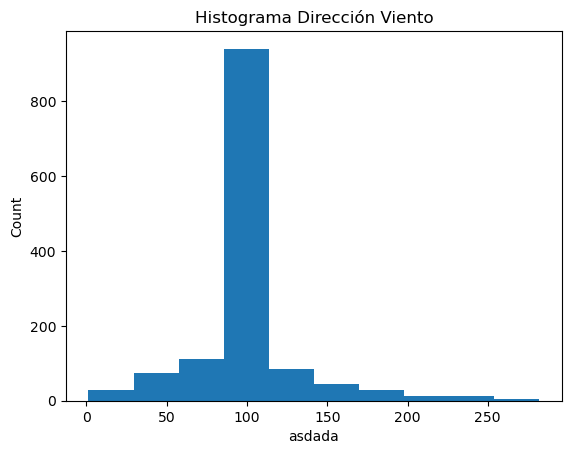

In [40]:
plt.hist(resultado_pivot.DV, bins=10)
plt.title("Histograma Dirección Viento")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

<AxesSubplot:xlabel='DV'>

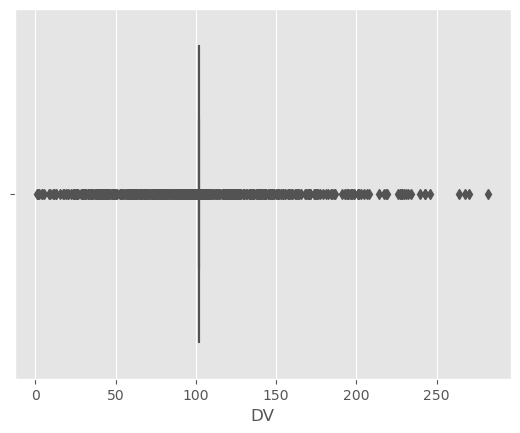

In [41]:
sns.boxplot(x=resultado_pivot.DV)

In [42]:
resultado_pivot.HR.describe()

count    1346.000000
mean       53.967450
std        14.751626
min         4.379310
25%        43.260215
50%        53.967450
75%        64.552558
max        90.741935
Name: HR, dtype: float64

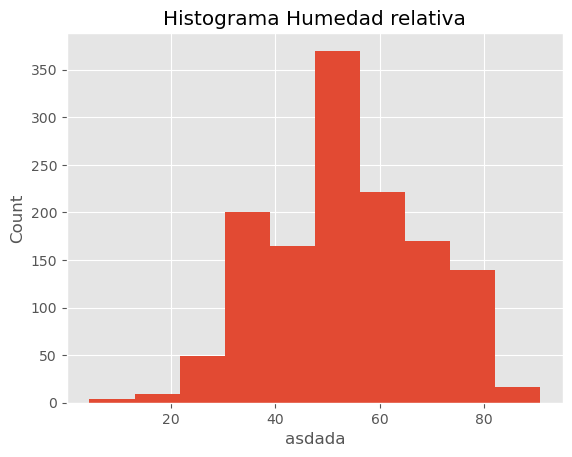

In [43]:
plt.hist(resultado_pivot.HR, bins=10)
plt.title("Histograma Humedad relativa")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

<AxesSubplot:xlabel='HR'>

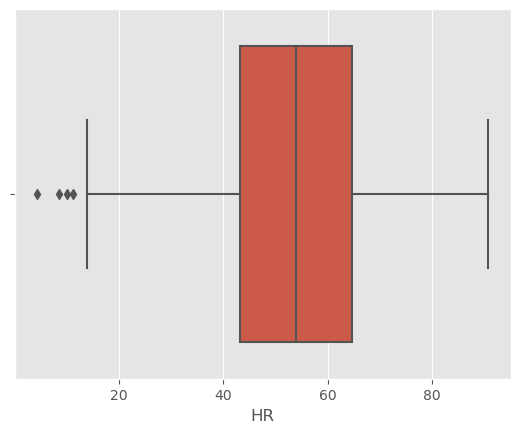

In [56]:
sns.boxplot(x=resultado_pivot.HR)

In [44]:
resultado_pivot.P.describe()

count    1346.000000
mean        0.899707
std         0.551321
min         0.000000
25%         0.899707
50%         0.899707
75%         0.899707
max         4.435484
Name: P, dtype: float64

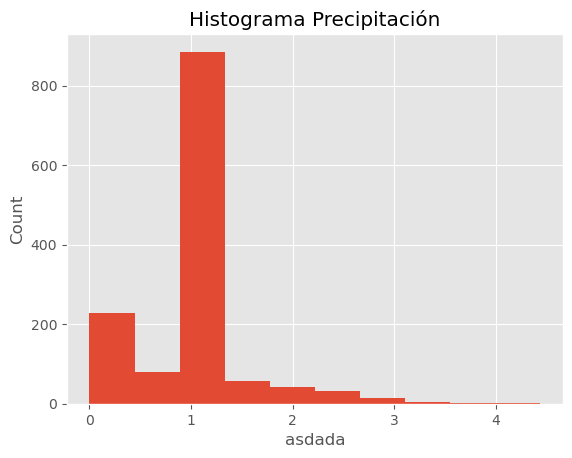

In [45]:
plt.hist(resultado_pivot.P, bins=10)
plt.title("Histograma Precipitación")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

<AxesSubplot:xlabel='P'>

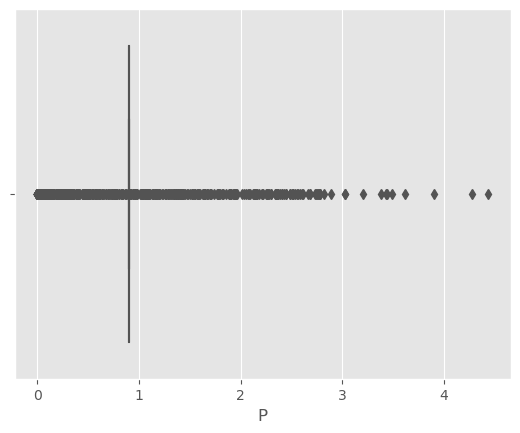

In [57]:
sns.boxplot(x=resultado_pivot.P)

In [46]:
resultado_pivot.PB.describe()

count    1346.000000
mean      944.737854
std         2.863851
min       916.206897
25%       944.737854
50%       944.737854
75%       944.737854
max       958.689655
Name: PB, dtype: float64

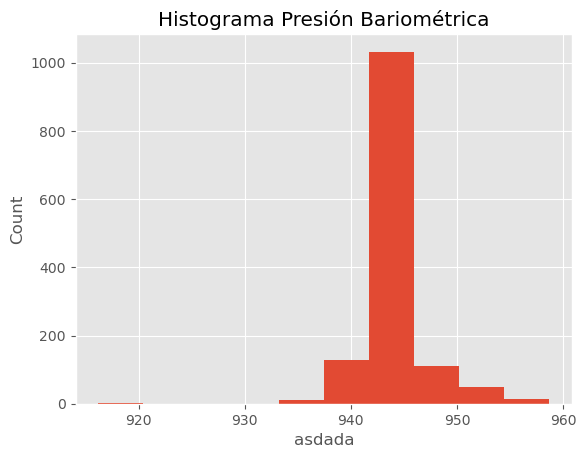

In [47]:
plt.hist(resultado_pivot.PB, bins=10)
plt.title("Histograma Presión Bariométrica")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

<AxesSubplot:xlabel='PB'>

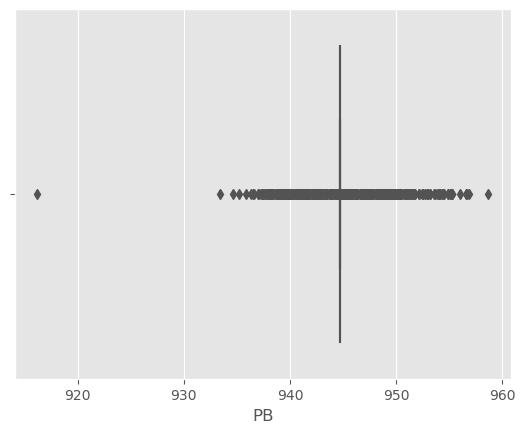

In [58]:
sns.boxplot(x=resultado_pivot.PB)

In [48]:
resultado_pivot.RS.describe()

count    1346.000000
mean      203.936864
std        49.848089
min        54.322581
25%       203.936864
50%       203.936864
75%       203.936864
max       351.821429
Name: RS, dtype: float64

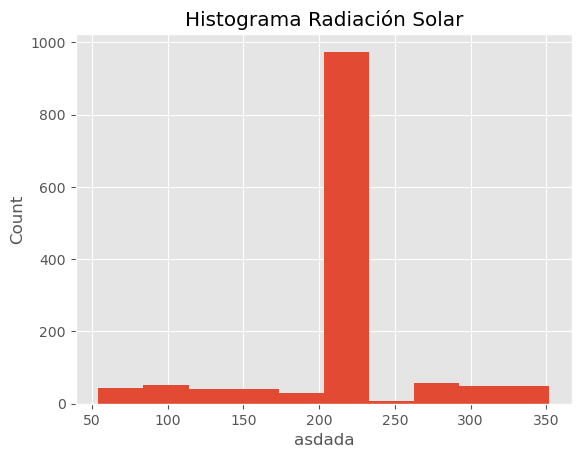

In [49]:
plt.hist(resultado_pivot.RS, bins=10)
plt.title("Histograma Radiación Solar")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

<AxesSubplot:xlabel='RS'>

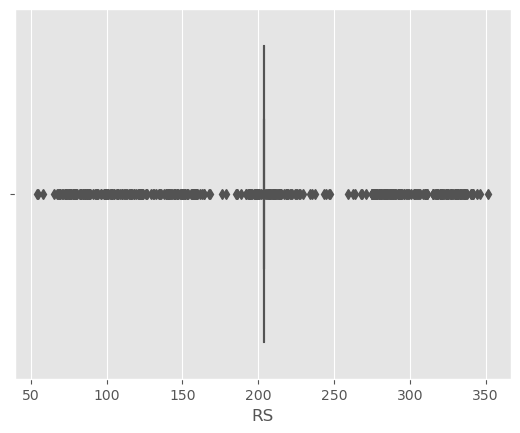

In [59]:
sns.boxplot(x=resultado_pivot.RS)

In [50]:
resultado_pivot.RU.describe()

count    1346.000000
mean       17.029968
std         1.061796
min         4.322581
25%        17.029968
50%        17.029968
75%        17.029968
max        40.157895
Name: RU, dtype: float64

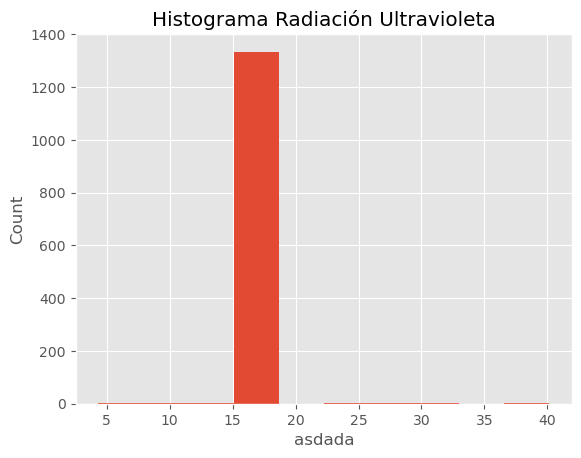

In [51]:
plt.hist(resultado_pivot.RU, bins=10)
plt.title("Histograma Radiación Ultravioleta")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

<AxesSubplot:xlabel='RU'>

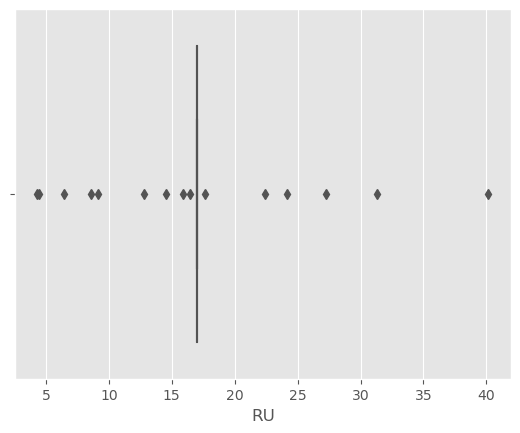

In [60]:
sns.boxplot(x=resultado_pivot.RU)

In [52]:
resultado_pivot.TEMP.describe()

count    1346.000000
mean       16.002898
std         7.131210
min         0.487500
25%        10.155833
50%        16.002898
75%        21.685995
max        33.900000
Name: TEMP, dtype: float64

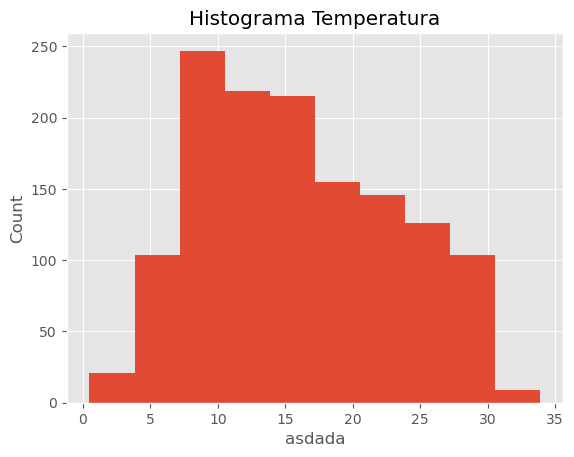

In [53]:
plt.hist(resultado_pivot.TEMP, bins=10)
plt.title("Histograma Temperatura")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

<AxesSubplot:xlabel='TEMP'>

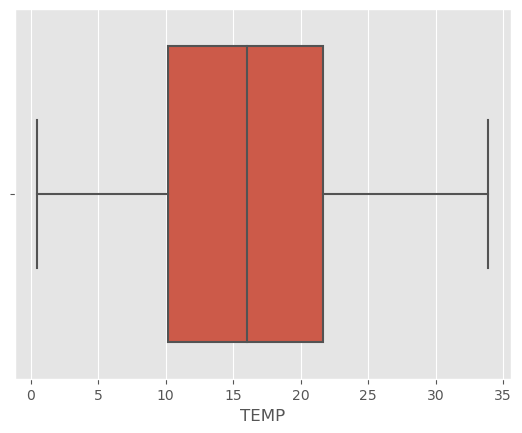

In [61]:
sns.boxplot(x=resultado_pivot.TEMP)

In [54]:
resultado_pivot.VV.describe()

count    1346.000000
mean        1.314981
std         0.262540
min         0.450968
25%         1.314981
50%         1.314981
75%         1.314981
max         2.683478
Name: VV, dtype: float64

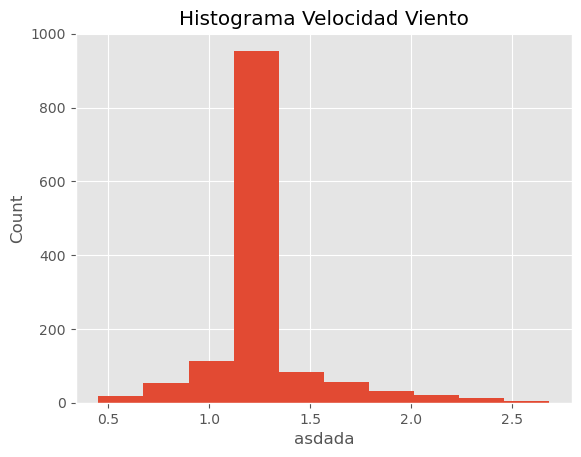

In [55]:
plt.hist(resultado_pivot.VV, bins=10)
plt.title("Histograma Velocidad Viento")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

<AxesSubplot:xlabel='VV'>

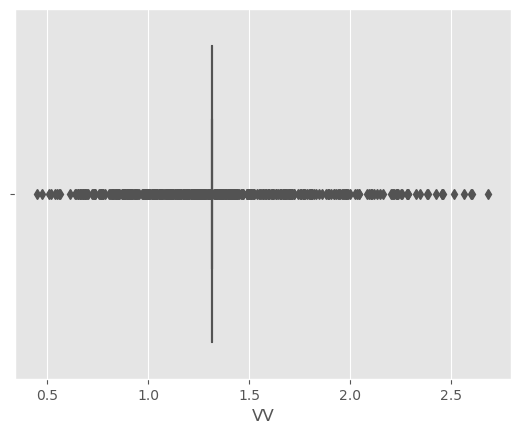

In [62]:
sns.boxplot(x=resultado_pivot.VV)

In [64]:
Q1 = resultado_pivot.quantile(0.25)
Q3 = resultado_pivot.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MAGNITUD
DV       0.000000
HR      21.292343
P        0.000000
PB       0.000000
RS       0.000000
RU       0.000000
TEMP    11.530161
VV       0.000000
dtype: float64


## relacion entre variables numéricas

In [76]:
x = resultado_pivot.VV
y = resultado_pivot.TEMP

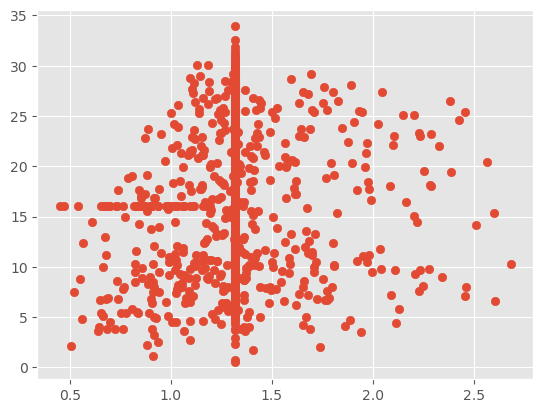

In [77]:
plt.scatter(x, y)

In [80]:
x = resultado_pivot.HR
y = resultado_pivot.TEMP

Text(0.5, 1.0, 'Gráfico de Dispersión')

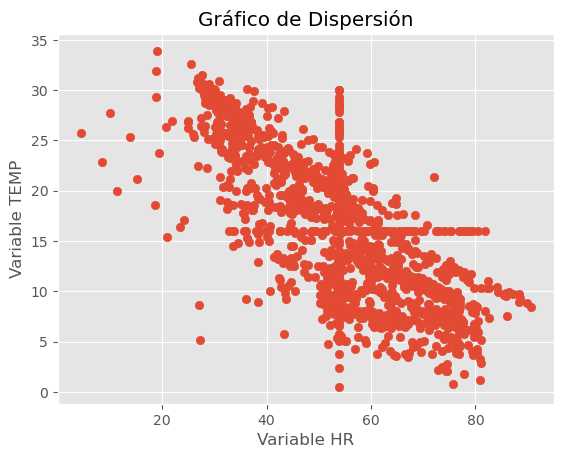

In [81]:
plt.scatter(x, y)
plt.xlabel("Variable HR")
plt.ylabel("Variable TEMP")
plt.title("Gráfico de Dispersión")